Networkx for scp-infer / AnnData Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scp_infer as scpi
import networkx as nx
import scanpy as sc

/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Current dir:  /home/jans/Documents/Masterarbeit/code/scp-infer
['/home/jans/Documents/Masterarbeit/code/scp-infer', '/home/jans/miniconda3/envs/py-infer/lib/python312.zip', '/home/jans/miniconda3/envs/py-infer/lib/python3.12', '/home/jans/miniconda3/envs/py-infer/lib/python3.12/lib-dynload', '', '/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages', '/home/jans/Documents/Masterarbeit/code/scp-infer/algorithm_implementations']
PyTorch not installed. Please install it to use DCDI.


In [2]:
results_file = '../data/edited/Schraivogel_chr8-un-scaled-20genes.h5ad'
adata = sc.read_h5ad(results_file)

In [3]:
#1st step: extract data matrix, gene names and cell names from the AnnData object
gene_names = adata.var_names
cell_names = adata.obs_names

#print("Data matrix shape: ", df.shape)
#print("sample: ", df.iloc[0:3,0:3])
print(len(gene_names),"genes: ", [i for i in gene_names[:3]])
print(len(cell_names),"cells: ", [i for i in cell_names[:1]])

#2nd step: extract metadata from the AnnData object and exctract perturbation information
metadata = adata.obs
metadata.head()

# Look at more perturbation labels
# print(adata.obs['perturbation'].astype(str).copy()[1000:1020])

20 genes:  ['CCNE2', 'CPQ', 'CROPseq_dCas9_DS_chr8:103754850-103755402_5_+']
3638 cells:  ['TGATTGACAAACCTGAGAGCTATA-sample_14']


,replicate,tissue_type,cell_line,cancer,disease,celltype,organism,perturbation,perturbation_type,ncounts,...,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,non-targeting,multiplet,control,nan,gene_perturbation_mask
cell_barcode,,,,,,,,,,,,,,,,,,,,,
TGATTGACAAACCTGAGAGCTATA-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,RIPK2,CRISPR,1247.0,...,61,1247.0,61,0.0,0.0,False,False,False,False,True
TGATTGACAAACCTGAGTCGAGTG-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,DSCC1,CRISPR,2615.0,...,65,2615.0,65,0.0,0.0,False,False,False,False,True
TGATTGACAAACCTGCAACTTGAC-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,OXR1,CRISPR,1445.0,...,63,1445.0,63,0.0,0.0,False,False,False,False,True
TGATTGACAAACCTGCAGTATCTG-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,non-targeting,CRISPR,1711.0,...,72,1711.0,72,0.0,0.0,True,False,False,False,False
TGATTGACAAACCTGCATGCAATC-sample_14,sample_14,cell_line,K562,True,chronic myelogenous leukemia,lymphoblasts,human,STK3,CRISPR,974.0,...,60,974.0,60,0.0,0.0,False,False,False,False,True


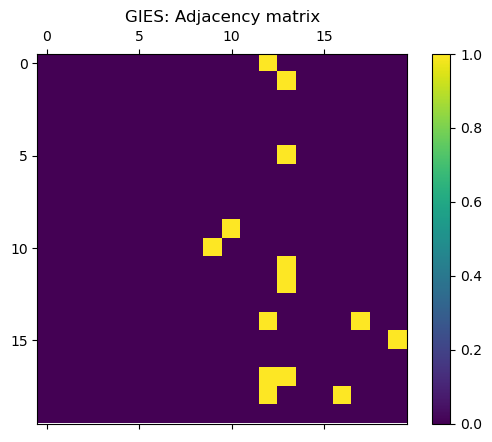

In [4]:
run_GIES = False
if run_GIES:
    gies_imp = scpi.inference.gies.GIESImp(adata, verbose= True)
    gies_imp.convert_data(singularized=False)
    gies_matrix = gies_imp.infer(plot=True)
    scpi.eval.plot_adjacency_matrix(gies_matrix, title="GIES")
    np.save('../data/adjacencies/GIES_20genes_matrix.npy', gies_matrix)
else:
    gies_matrix = np.load('../data/adjacencies/GIES_20genes_matrix.npy')
    scpi.eval.plot_adjacency_matrix(gies_matrix, title="GIES")

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]]


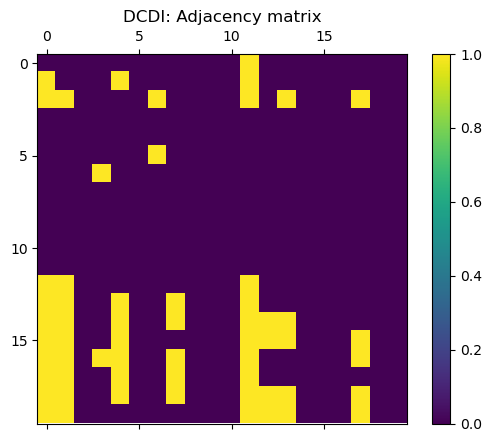

In [6]:
dcdi_matrix = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,], [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,], [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,], [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,]])
print(dcdi_matrix)
scpi.eval.plot_adjacency_matrix(dcdi_matrix, title="DCDI")

In [7]:
grnb_matrix = np.load('../data/adjacencies/GRNBoost_20genes_matrix.npy')
grnb_discrete_matrix = grnb_matrix > 3
grnb_discrete_matrix = grnb_discrete_matrix.astype(int)

print(grnb_discrete_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Graph evaluation

In [7]:
gies_tp, gies_fp, gies_wasserstein_distances = scpi.eval.evaluate_wasserstein(adata, gies_matrix)
gies_wassertstein = np.mean(gies_wasserstein_distances)
print("True positives: ", gies_tp)
print("False positives: ", gies_fp)
print("Mean Wasserstein distance: ", np.mean(gies_wasserstein_distances))

gies_false_omisson_rate, gies_negative_mean_wasserstein = scpi.eval.evaluate_f_o_r(adata, gies_matrix)
print("False omission rate: ", gies_false_omisson_rate)
print("Negative mean Wasserstein distance: ", gies_negative_mean_wasserstein)

True positives:  5
False positives:  5
Mean Wasserstein distance:  0.2298502549356154
Evaluating Wasserstein
False omission rate:  0.3168044077134986
Negative mean Wasserstein distance:  0.1024837301897236


In [8]:
dcdi_tp, dcdi_fp, dcdi_wasserstein_distances = scpi.eval.evaluate_wasserstein(adata, dcdi_matrix)
dcdi_wassertstein = np.mean(dcdi_wasserstein_distances)
print("True positives: ", dcdi_tp)
print("False positives: ", dcdi_fp)
print("Mean Wasserstein distance: ", np.mean(dcdi_wasserstein_distances))

dcdi_false_omisson_rate, dcdi_negative_mean_wasserstein = scpi.eval.evaluate_f_o_r(adata, dcdi_matrix)
print("False omission rate: ", dcdi_false_omisson_rate)
print("Negative mean Wasserstein distance: ", dcdi_negative_mean_wasserstein)

True positives:  16
False positives:  36
Mean Wasserstein distance:  0.09991260949298274
Evaluating Wasserstein
False omission rate:  0.2724358974358974
Negative mean Wasserstein distance:  0.11790671633419027


In [9]:
grnb_tp, grnb_fp, grnb_wasserstein_distances = scpi.eval.evaluate_wasserstein(adata, grnb_discrete_matrix)
grnb_wassertstein = np.mean(grnb_wasserstein_distances)
print("True positives: ", grnb_tp)
print("False positives: ", grnb_fp)
print("Mean Wasserstein distance: ", np.mean(grnb_wasserstein_distances))

grnb_false_omisson_rate, grnb_negative_mean_wasserstein = scpi.eval.evaluate_f_o_r(adata, grnb_discrete_matrix)
print("False omission rate: ", grnb_false_omisson_rate)
print("Negative mean Wasserstein distance: ", grnb_negative_mean_wasserstein)

True positives:  3
False positives:  5
Mean Wasserstein distance:  0.11509265350515929
Evaluating Wasserstein
False omission rate:  0.34674922600619196
Negative mean Wasserstein distance:  0.11435421154160814


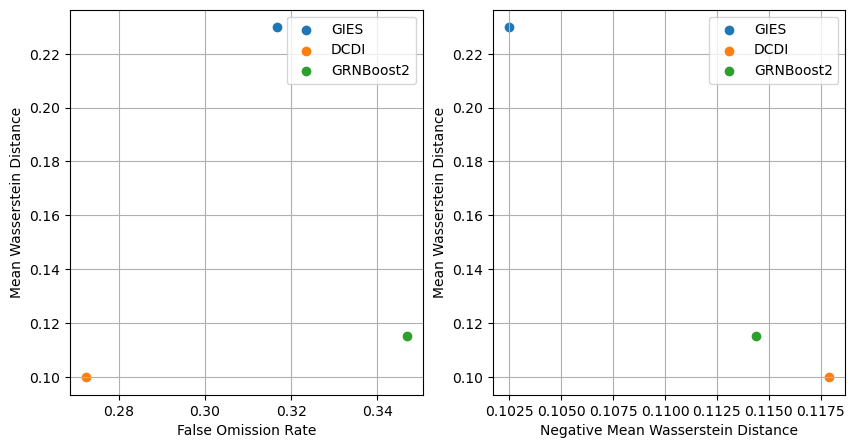

In [10]:
# Plot Mean Wasserstein Disctance vs. False Omission Rate
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(gies_false_omisson_rate, gies_wassertstein, label="GIES")
ax[0].scatter(dcdi_false_omisson_rate, dcdi_wassertstein, label="DCDI")
ax[0].scatter(grnb_false_omisson_rate, grnb_wassertstein, label="GRNBoost2")
ax[0].set_xlabel("False Omission Rate")
ax[0].set_ylabel("Mean Wasserstein Distance")
ax[0].grid()
ax[0].legend()

ax[1].scatter(gies_negative_mean_wasserstein, gies_wassertstein, label="GIES")
ax[1].scatter(dcdi_negative_mean_wasserstein, dcdi_wassertstein, label="DCDI")
ax[1].scatter(grnb_negative_mean_wasserstein, grnb_wassertstein, label="GRNBoost2")
ax[1].set_xlabel("Negative Mean Wasserstein Distance")
ax[1].set_ylabel("Mean Wasserstein Distance")
ax[1].grid()
ax[1].legend()

plt.savefig("../figures/mean_wasserstein_vs_false_omission_rate.png")
plt.show()

In [9]:
# test DE graph eval
for label, matrix in zip(["GIES", "DCDI", "GRNBoost2"], [gies_matrix, dcdi_matrix, grnb_discrete_matrix]):
    upstream, donwstream, unrelated = scpi.eval.de_graph_hierarchy(adata, matrix)
    print(label, "upstream: ", upstream)
    print(label, "downstream: ", donwstream)
    print(label, "unrelated: ", unrelated)

perturbed_genes:  Index(['CCNE2', 'CPQ', 'DSCC1', 'FAM83A', 'LRRCC1', 'OXR1', 'PHF20L1', 'RIPK2',
       'STK3', 'UBR5'],
      dtype='object', name='gene_symbol')
GIES upstream:  15
GIES downstream:  13
GIES unrelated:  162
perturbed_genes:  Index(['CCNE2', 'CPQ', 'DSCC1', 'FAM83A', 'LRRCC1', 'OXR1', 'PHF20L1', 'RIPK2',
       'STK3', 'UBR5'],
      dtype='object', name='gene_symbol')


/home/jans/Documents/Masterarbeit/code/scp-infer/scp_infer/eval/stat_eval.py:169: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_obj.obs['perturbation_group'] = adata_obj.obs['perturbation']
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning:

DCDI upstream:  33
DCDI downstream:  56
DCDI unrelated:  101
perturbed_genes:  Index(['CCNE2', 'CPQ', 'DSCC1', 'FAM83A', 'LRRCC1', 'OXR1', 'PHF20L1', 'RIPK2',
       'STK3', 'UBR5'],
      dtype='object', name='gene_symbol')
GRNBoost2 upstream:  7
GRNBoost2 downstream:  20
GRNBoost2 unrelated:  163


/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/jans/miniconda3/envs/py-infer/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.st

In [6]:
print("Upstream: ", upstream)
print("Downstream: ", donwstream)
print("Unrelated: ", unrelated)

Upstream:  15
Downstream:  13
Unrelated:  162
